# 1 Regular Languages

----
## 1.1 Finite Automata

단수 automaton 복수 automata

유한오토마타(finite automata, FA)를 유한상태기계(finite state machine, FSM)이라고도 함

### Formal definition of a finite automaton

* Definition 1.5

  유한오토마타란 $(Q,\Sigma,\delta,q_0,F)$의 5-튜플이며, 이 때
    1. $Q$ 상태(state)의 유한집합
    1. $\Sigma$ 알파벳 - 심볼(symbol)의 유한집합
    1. $\delta : Q\times\Sigma \to Q$ 전이함수(transition funciton)
    1. $q_0 \in Q$ 시작 상태(start state)
    1. $F \subseteq Q$ 종료상태(final state)의 집합
  
  종료상태 혹은 끝나는 상태를 받아들여지는 상태(accept state)라고도 한다.

우선 결정적 유한오토마타(deterministic finite automata, DFA)부터 살펴보자.

In [1]:
newtype DFA q a = DFA ([q], [a], (q,a) -> q, q, [q])
{-
   q 상태의 타입
   a 심볼의 타입
   [q] 상태가 여러 개 나열된 타입 (집합 대신 그냥 리스트로 표현)
   [a] 심볼이 여러 개 나열된 타입 (집합 대신 그냥 리스트로 표현)
-}

instance (Show q, Show a) => Show (DFA q a) where
  show (DFA (qs,as,d,q0,fs)) = show (qs,as,dtbl,q0,fs)
      where dtbl = d2tblDFA qs as d

-- 문자열은 아니지만 문자열로 변환/역변환 가능한 상태 타입의 DFA를
-- 같은 기능을 하는 String 상태 타입의 DFA로 변환
-- (q와 문자열 사이의 변환이 1:1이라는 가정한다)
toStringDFA :: (Read q, Show q) => DFA q a -> DFA String a
toStringDFA (DFA (qs,as,d,q0,fs)) = DFA (qs',as,d',q0',fs')
    where
    qs' = map show qs
    fs' = map show fs
    q0' = show q0
    d'(r,a) = show $ d(read r,a)

-- 전이함수를 순서쌍 데이타로
d2tblDFA qs as d = [((q,a), d(q,a)) | q<-qs, a<-as]

In [2]:
import Data.Maybe (fromJust)
import Data.List (elemIndex, groupBy, intercalate)

import IHaskell.Display.Graphviz
-- dot "digraph { l -> o; o -> v; v -> e; h -> a ; a -> s; s -> k ; k -> e ; e -> l ; l -> l}"

dfa2graph :: Show a => DFA String a -> String
dfa2graph (DFA (qs,as,d,q0,fs))
     = "digraph { node [shape=circle]; rankdir=LR; "
    ++ "thestart [shape=none label=\"\" width=0]; "
    ++ "thestart -> "++show(q2i q0)++"; "
    ++ concat [show i++" [label=\""++i2q i++"\"]; " | i<-is]
    ++ concat [show(q2i q)++" [shape=doublecircle]; " | q<-fs]
    -- ++ concat [show i++" -> "++show(d'(i,a))++" [label=\""++show a++"\"]; " | i<-is, a<-as] -- 각각 라벨
    ++ concat [ show i++" -> "++show j++" [label=\""++showls ls++"\"]" | ((i,j),ls) <-es] -- 같은 시작/끝 점 모아 라벨
    ++ "}"
    where
    is = [0 .. length qs-1]
    q2i q = fromJust $ elemIndex q qs
    i2q i = qs !! i
    d'(i,a) = q2i $ d(i2q i,a)
    es = map collectSnd $ groupByFst [((i,d'(i,a)), a) | i<-is, a<-as]
    showls = intercalate "," . map show

groupByFst = groupBy (\(x1,_) (x2,_) -> x1==x2)
collectSnd ps = (x, ls)
    where (x:_, ls) = unzip ps

drawDFA :: Show a => DFA String a -> Graphviz
drawDFA = dot . dfa2graph

In [3]:
dfaM1 = DFA (["q1","q2","q3"],[0,1],d,"q1",["q2"])
    where
    d("q1",0) = "q1"
    d("q1",1) = "q2"
    d("q2",0) = "q3"
    d("q2",1) = "q2"
    d("q3",0) = "q2"
    d("q3",1) = "q2"

In [4]:
dfaM1

(["q1","q2","q3"],[0,1],[(("q1",0),"q1"),(("q1",1),"q2"),(("q2",0),"q3"),(("q2",1),"q2"),(("q3",0),"q2"),(("q3",1),"q2")],"q1",["q2"])

"digraph { node [shape=circle]; rankdir=LR; thestart [shape=none label=\"\" width=0]; thestart -> 0; 0 [label=\"q1\"]; 1 [label=\"q2\"]; 2 [label=\"q3\"]; 1 [shape=doublecircle]; 0 -> 0 [label=\"0\"]0 -> 1 [label=\"1\"]1 -> 2 [label=\"0\"]1 -> 1 [label=\"1\"]2 -> 1 [label=\"0,1\"]}"

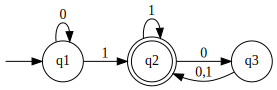

In [5]:
dfa2graph dfaM1
drawDFA dfaM1

### Examples of finite automata


In [6]:
-- dfaM2

In [7]:
-- dfaM3

In [8]:
-- dfaM4

In [9]:
-- dfaM5

### Formal defintion of computation

* Definition 1.6 인식하는 유한오토마타가 존재하는 언어가 정규언어

  a regular language if some finite automaton recognizes it

* $M$ recognizes language $A$

  if $A = \{w\mid M ~\text{accepts}~ w\}$

* $M=(Q,\Sigma,\delta,q_0,F)$ accepts $w = a_1a_2a_3\cdots a_n$ where $a_i\in\Sigma$

  if $\delta(\cdots(\delta(\delta(\delta(q_0,a_1),a_2),a_3),\cdots,a_n) \in F$
  
  도식적으로 나타내면
  $q_0 \stackrel{a_1}{\longrightarrow} r_1
       \stackrel{a_2}{\longrightarrow} r_2
       \stackrel{a_3}{\longrightarrow} \cdots
       \stackrel{a_n}{\longrightarrow} r_n$ where $r_n \in F$

In [10]:
(DFA (_,_,d,q0,fs)) `accepts` w = foldl (curry d) q0 w `elem` fs

In [11]:
dfaM1 `accepts` []
dfaM1 `accepts` [0]
dfaM1 `accepts` [1]

False

False

True

In [12]:
dfaM1 `accepts` [0,0]
dfaM1 `accepts` [0,1]
dfaM1 `accepts` [1,0]
dfaM1 `accepts` [1,1]

False

True

False

True

In [13]:
dfaM1 `accepts` [1,0,0]
dfaM1 `accepts` [1,0,1]
dfaM1 `accepts` [1,1,0]
dfaM1 `accepts` [1,1,1]

True

True

False

True

### Designing finite automata

교재 정독

### The regular operations

* Definition 1.23 두 언어 A와 B에 대한 정규연산 세 가지

    * union $A\cup B$
    * concatentation $A\cdot B$
    * star $A^*$


* Theorem 1.25

  The class of regular languages is closed under the union operation

  즉, $A$와 $B$가 정규언어이면 $A\cup B$도 정규언어


----
## 1.2 Nondeterminism

### Formal defintion of a nondeterministic finite automata

### Equivalenceof NFAs and DFAs

### Closure under the regular operations

----
## 1.3 Regular Expression

### Formal definition of a regular expression

### Equivalence with finite automata

----
## 1.4 Nonregular Languages

### The pumping lemma for regular languages